In [28]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt   

In [29]:
data_inicial= '2023-05-01'
Ticker= yf.download('PMAM3.SA',  start= data_inicial)
display(Ticker)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-02,3.82,3.90,3.71,3.77,3.77,24100
2023-05-03,3.79,3.93,3.79,3.88,3.88,26600
2023-05-04,3.90,4.07,3.90,3.98,3.98,41700
2023-05-05,3.97,4.01,3.71,3.89,3.89,49400
2023-05-08,3.88,4.00,3.77,3.94,3.94,59200
...,...,...,...,...,...,...
2023-08-01,5.68,5.71,5.58,5.68,5.68,29300
2023-08-02,5.68,5.82,5.40,5.40,5.40,52200
2023-08-03,5.41,5.51,5.32,5.44,5.44,70700


In [30]:
# Renomear as colunas
ticker = Ticker.rename(columns={
    'Open': 'Abertura',
    'High': 'Maior',
    'Low': 'Menor',
    'Close': 'Fechamento',
    'Adj Close': 'Fechamento Ajustado',
    'Volume': 'Volume'
})

# Atribuir novos nomes diretamente às colunas
ticker.columns = ['Abertura', 'Maior', 'Menor', 'Fechamento', 'Fechamento Ajustado', 'Volume']
ticker = ticker.round(2)

display(ticker)

,Abertura,Maior,Menor,Fechamento,Fechamento Ajustado,Volume
Date,,,,,,
2023-05-02,3.82,3.90,3.71,3.77,3.77,24100
2023-05-03,3.79,3.93,3.79,3.88,3.88,26600
2023-05-04,3.90,4.07,3.90,3.98,3.98,41700
2023-05-05,3.97,4.01,3.71,3.89,3.89,49400
2023-05-08,3.88,4.00,3.77,3.94,3.94,59200
...,...,...,...,...,...,...
2023-08-01,5.68,5.71,5.58,5.68,5.68,29300
2023-08-02,5.68,5.82,5.40,5.40,5.40,52200
2023-08-03,5.41,5.51,5.32,5.44,5.44,70700


taxa simples de retorno diário

In [31]:
# Aqui, stbp3['Fechamento Ajustado'] representa a série temporal dos preços de fechamento ajustados do ativo (ou a série temporal que você deseja calcular os retornos). O uso de shift(1) desloca essa série uma posição para cima, o que significa que estamos usando os preços de fechamento ajustados do dia anterior (t-1). Ao dividir os preços de fechamento atuais pelos preços de fechamento do dia anterior e subtrair 1, estamos calculando o retorno simples diário em termos percentuais.
ticker['retorno_diario']= (ticker['Fechamento Ajustado'] / ticker['Fechamento Ajustado'].shift(1)) -1
print(ticker['retorno_diario'])

Date
2023-05-02         NaN
2023-05-03    0.029178
2023-05-04    0.025773
2023-05-05   -0.022613
2023-05-08    0.012853
                ...   
2023-08-01   -0.003509
2023-08-02   -0.049296
2023-08-03    0.007407
2023-08-04   -0.011029
2023-08-07   -0.035316
Name: retorno_diario, Length: 69, dtype: float64


In [32]:
retorno_dia= ticker['retorno_diario'].mean()
# 250 porque não sao todos os dias que se tem negociação na B3
retorno_ano= ticker['retorno_diario'].mean()*250
# o 2 representa que só quero duas casas decimais 
print(f"O retorno anual é de {round(retorno_ano* 100, 2)}%")



O retorno anual é de 127.98%


In [34]:
# log=fechamento final / fechamento inicial
ticker['retorno_log']= np.log(ticker['Fechamento Ajustado'] / ticker['Fechamento Ajustado'].shift(1))
print(ticker['retorno_log'])

Date
2023-05-02         NaN
2023-05-03    0.028760
2023-05-04    0.025447
2023-05-05   -0.022873
2023-05-08    0.012772
                ...   
2023-08-01   -0.003515
2023-08-02   -0.050552
2023-08-03    0.007380
2023-08-04   -0.011091
2023-08-07   -0.035955
Name: retorno_log, Length: 69, dtype: float64


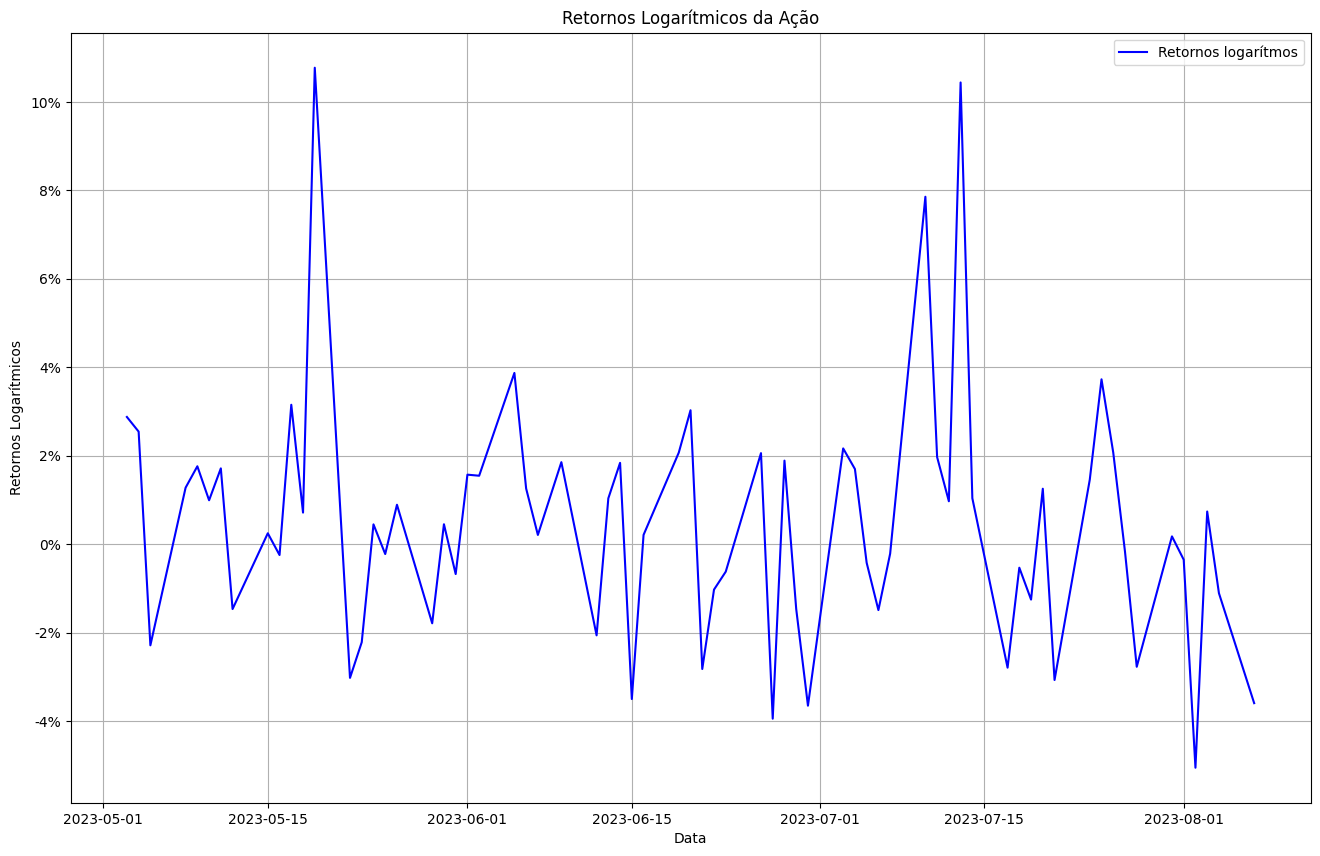

 O retorno anual é de 117.52%


In [35]:

plt.figure(figsize=(16, 10))
plt.plot(ticker.index, ticker['retorno_log'], color='blue', label='Retornos logarítmos')

plt.title('Retornos Logarítmicos da Ação')

plt.xlabel('Data')
plt.ylabel('Retornos Logarítmicos')

# Formatando os rótulos do eixo y em porcentagem
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

plt.legend()
plt.grid(True)
plt.show()

retorno_ano= ticker['retorno_log'].mean()*250
print(f' O retorno anual é de {round(retorno_ano *100, 2)}%')